In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectPercentile

from sklearn.model_selection import GridSearchCV

from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [7]:
import csv
import numpy as np

from matplotlib import pyplot as plt

In [15]:
# load data
# rows in X are subject major order, i.e. rows 0-9 are all samples from subject 0, rows 10-19 all samples from subject 1, etc.
# columns in X are in feature_type major order, i.e. columns 0-47 are alpha band power, eyes closed, electrodes 0-48
# feature identifiers for all columns in X are stored in feature_names.csv
X = np.loadtxt('data.csv', delimiter=',') 
y = np.loadtxt('labels.csv', delimiter=',')
with open('feature_names.csv') as f:
    csvreader = csv.reader(f, delimiter=',')
    feature_names = [row for row in csvreader][0]

# Feature selection: Fischer method tested with SVM

0 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[7 3]
 [0 0]]
sensitivity: nan
Specificity: 0.7


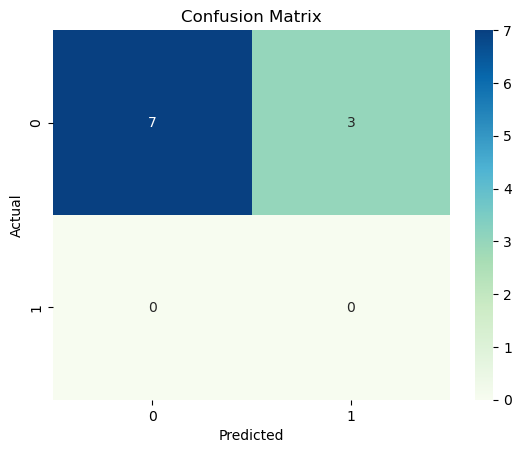

no. of iteration 10 Duration: 0:00:03.025244
10 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


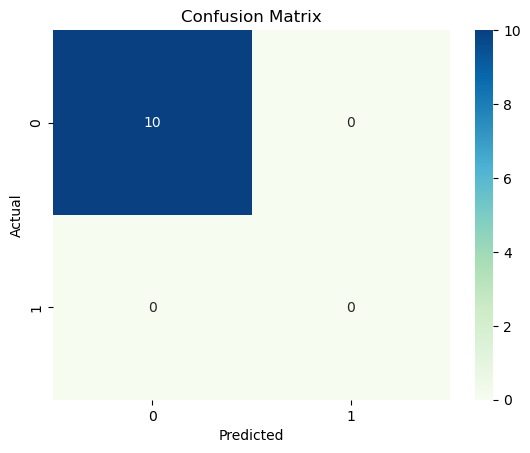

no. of iteration 20 Duration: 0:00:06.128585
20 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


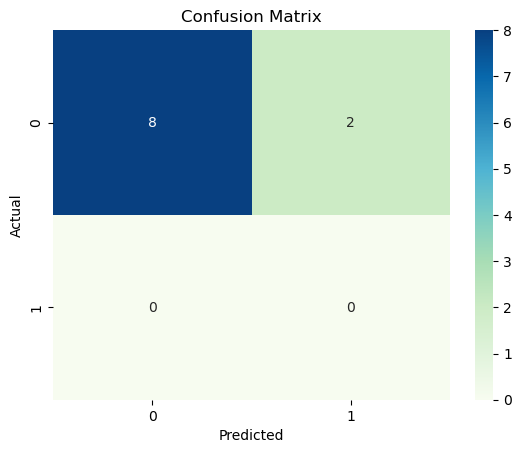

no. of iteration 30 Duration: 0:00:09.082924
30 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


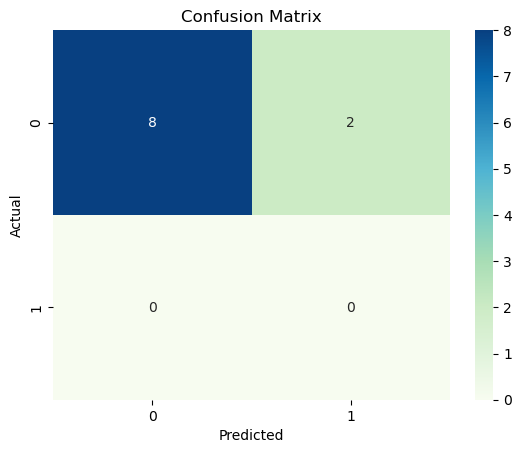

no. of iteration 40 Duration: 0:00:12.261844
40 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


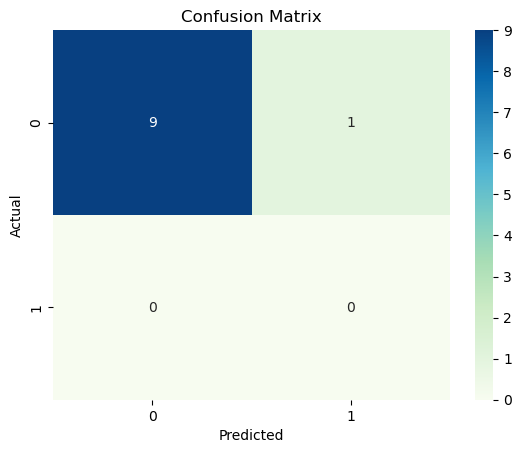

no. of iteration 50 Duration: 0:00:15.197669
50 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


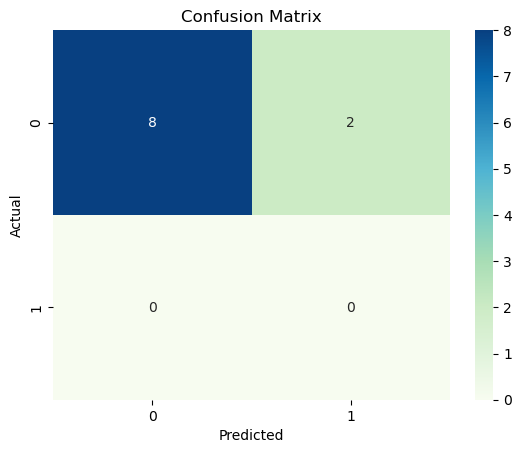

no. of iteration 60 Duration: 0:00:18.220086
60 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


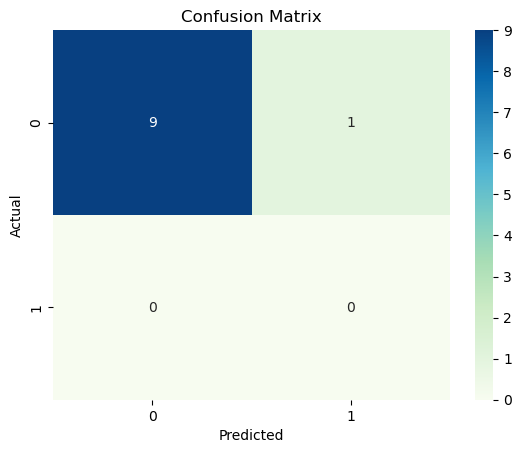

no. of iteration 70 Duration: 0:00:21.070291
70 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


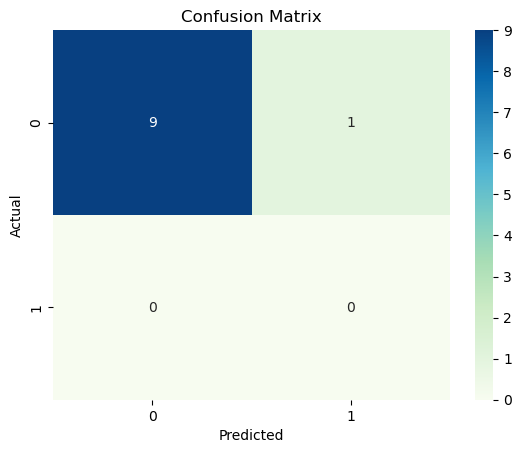

no. of iteration 80 Duration: 0:00:23.910624
80 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


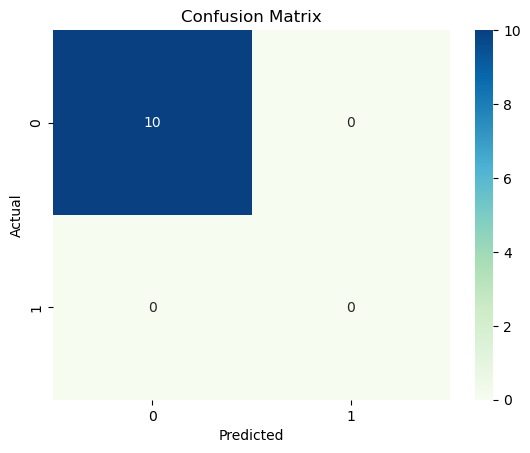

no. of iteration 90 Duration: 0:00:26.691724
90 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


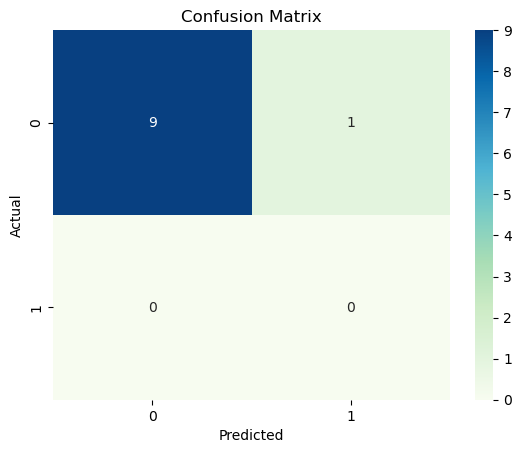

no. of iteration 100 Duration: 0:00:29.475796
100 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[ 0  0]
 [ 0 10]]
sensitivity: 1.0
Specificity: nan


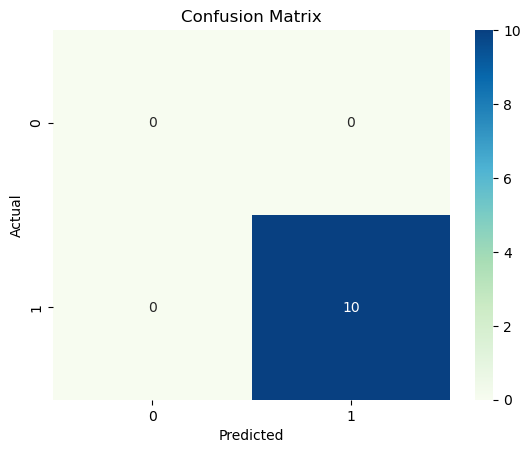

no. of iteration 110 Duration: 0:00:32.720441
110 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[ 0  0]
 [ 0 10]]
sensitivity: 1.0
Specificity: nan


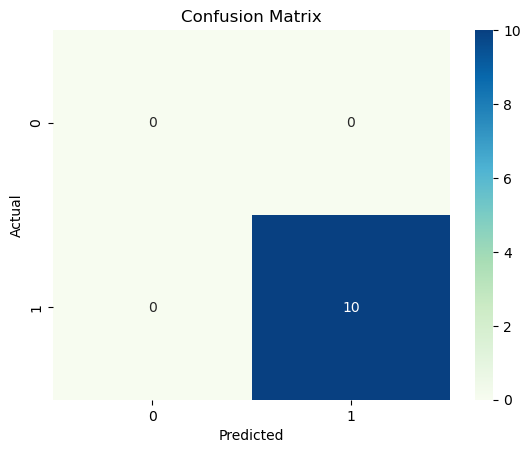

no. of iteration 120 Duration: 0:00:35.446929
120 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[ 0  0]
 [ 0 10]]
sensitivity: 1.0
Specificity: nan


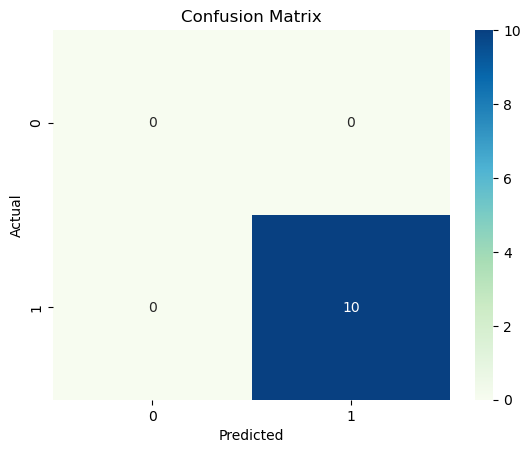

no. of iteration 130 Duration: 0:00:38.500182
130 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[ 0  0]
 [ 0 10]]
sensitivity: 1.0
Specificity: nan


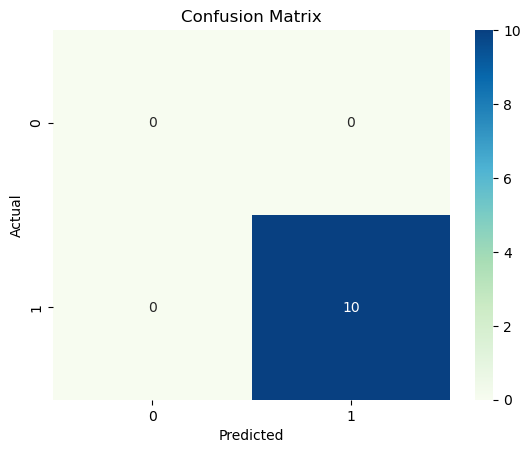

no. of iteration 140 Duration: 0:00:41.737672
140 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[0 0]
 [2 8]]
sensitivity: 0.8
Specificity: nan


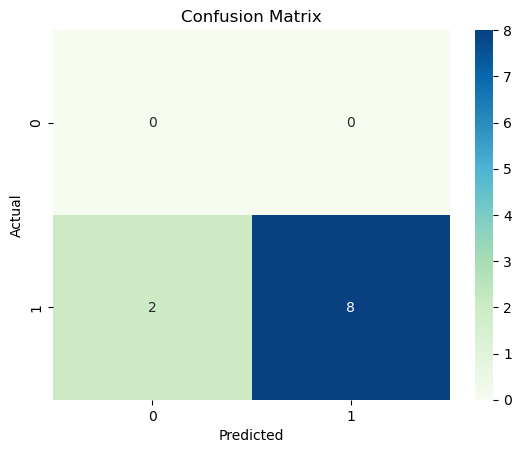

no. of iteration 150 Duration: 0:00:45.255082
150 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[0 0]
 [2 8]]
sensitivity: 0.8
Specificity: nan


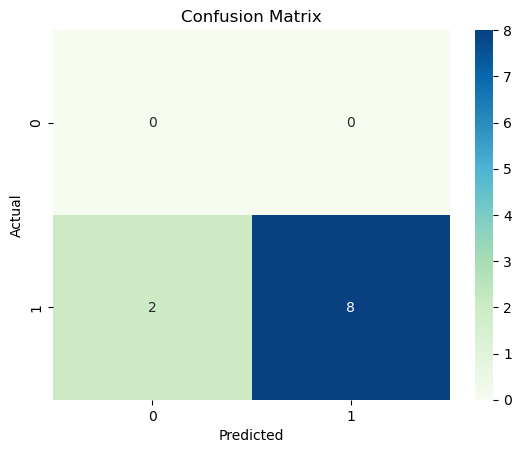

no. of iteration 160 Duration: 0:00:48.153042
160 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


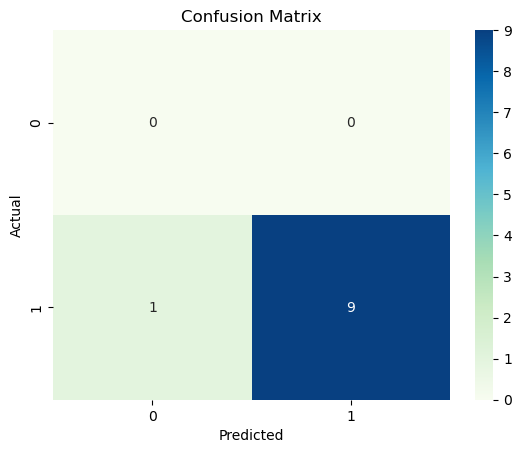

no. of iteration 170 Duration: 0:00:51.000721
170 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[0 0]
 [2 8]]
sensitivity: 0.8
Specificity: nan


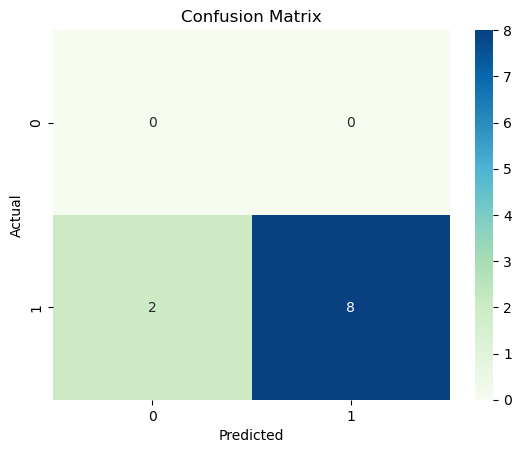

no. of iteration 180 Duration: 0:00:54.050684
Average svm score for the model of best feature sets: 0.8888888888888891


<AxesSubplot:>

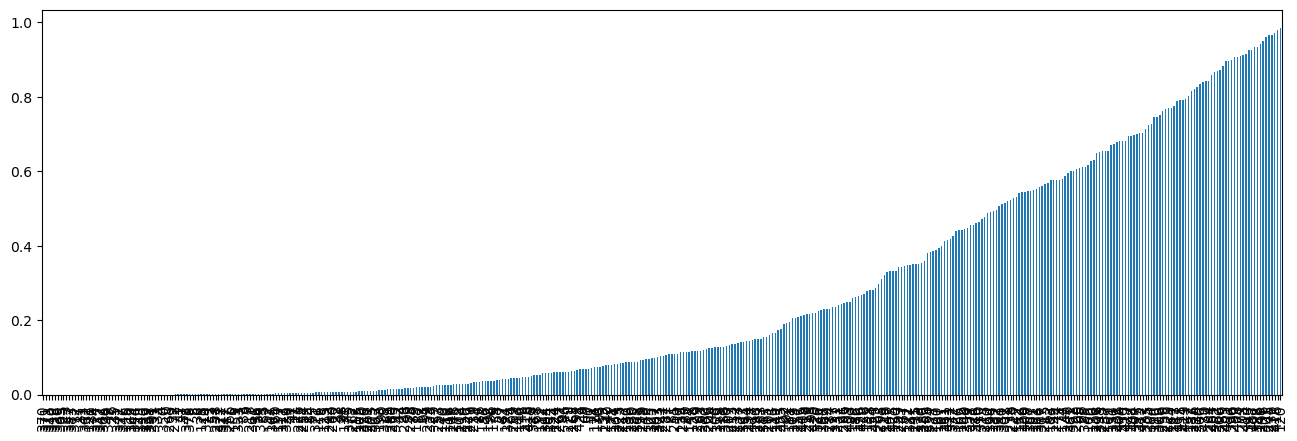

In [26]:
average_accuracy_score = 0
accuracy_scores = 0
svm_accuracy_score =[]
svm_specificity = []
svm_sensitivity = []
def run_svm(X_tr,X_te,y_tr,y_te):
        #global variables to be used in main function
        global average_accuracy_score 
        global accuracy_scores
        param_grid = {'C':[0.1,1,100,1000],'kernel':['linear','rbf','poly','sigmoid'],
              'degree':[1,2,3,4,5,6]}
        # grid search cv performed to tune/select best hyper parameters for svm model
        grid = GridSearchCV(SVC(),param_grid)
        grid.fit(X_tr,y_tr.values.ravel())
        # predicted labels 
        y_pred = grid.predict(X_te)
        accuracy_scores = accuracy_score(y_te,y_pred)
        average_accuracy_score = average_accuracy_score + (accuracy_score(y_te,y_pred))
        # confusion matrix used as a reference to calculate recall, precision, sensitivity, specificity
        conf_matrix=confusion_matrix(y_te,y_pred,labels=[0,1])
        recall=recall_score(y_te,y_pred)
        precision=precision_score(y_te,y_pred)
        sensitivity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
        specificity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
        #stored in arrays
        svm_accuracy_score.append(accuracy_score(y_te,y_pred))
        svm_specificity.append(specificity)
        svm_sensitivity.append(sensitivity)
        print("Confusion Matrix:")
        print(conf_matrix)
        print("sensitivity:", sensitivity)
        print("Specificity:", specificity)
        #heat map for confusion matrices
        sns.heatmap(conf_matrix,cmap="GnBu",annot=True,
        #cbar_kws={"orientation":"vertical","label":"color bar"},
        xticklabels=[0,1],yticklabels=[0,1])
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()

      
accuracy_score_list = [] 
#to mark the start time of the compilation
start_time = datetime.now()  
# loocv is performed keeping all record from single patient together in testing set and the rest in training set
for i in range(0,X.shape[0],10): 
        # testing data
        x_test_forcv = X[i:i+10]
        y_test_forcv = y[i:i+10]
        # training data
        x_train_forcv = np.concatenate((X[:i],X[i+10:]),axis=0)
        y_train_forcv = np.concatenate((y[:i],y[i+10:]),axis=0)
        print(i,x_test_forcv.shape,y_test_forcv.shape,x_train_forcv.shape,y_train_forcv.shape)
        # converting to pandas dataframes from numpy
        X_train = pd.DataFrame(x_train_forcv)
        X_test = pd.DataFrame(x_test_forcv)
        y_test = pd.DataFrame(y_test_forcv)
        y_train = pd.DataFrame(y_train_forcv)
        # fischer selection for svm starts from here
        sel=f_classif(x_train_forcv,y_train_forcv)
        # 2nd index of this array contains all the p values that are useful to filter features
        p_values = pd.Series(sel[1])
        p_values.sort_values(ascending=True,inplace=True)
        p_values_reduced = p_values[p_values<0.05]
        #p_values_reduced.index
        # reduced training and testing features using p values
        X_train_p  = X_train[p_values_reduced.index]
        X_test_p = X_test[p_values_reduced.index]
        # svm model implemented on reduced feature variables by calling the pre defined function
        run_svm(X_train_p,X_test_p,y_train,y_test) 
        #measuring the end time after loocv iteration
        end_time = datetime.now()
        print('no. of iteration',i+10,'Duration: {}'.format(end_time - start_time))
        # accuracy score stored in an array to calculate average later
        accuracy_score_list.append(accuracy_scores)
#average_accuracy_score = 0
#plot for last case only
print('Average svm score for the model of best feature sets:',average_accuracy_score/18)

        
 # for last one iteration p_value plot for all feature sets 
p_values.plot.bar(figsize = (16,5))

In [30]:
print("Accuracy score Mean:")
print(np.mean(svm_accuracy_score))
print("\n Accuracy score Sd:")
print(np.std(svm_accuracy_score))
print("\n Sensivitity score mean:")
print(np.nanmean(svm_sensitivity))
print("\n Specificity score mean:")
print(np.nanmean(svm_specificity))

Accuracy score Mean:
0.8888888888888888

 Accuracy score Sd:
0.0936238863686262

 Sensivitity score mean:
0.9125

 Specificity score mean:
0.8699999999999999


# Testing with logistic regression

0 (10, 432) (10,) (170, 432) (170,)
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[7 3]
 [0 0]]
sensitivity: nan
Specificity: 0.7


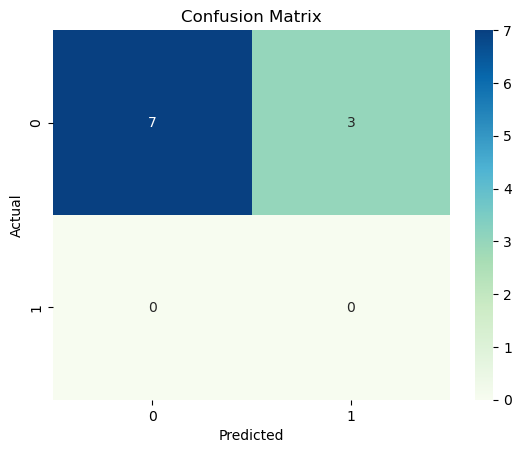

no. of iteration 10 Duration: 0:00:09.849264
10 (10, 432) (10,) (170, 432) (170,)
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


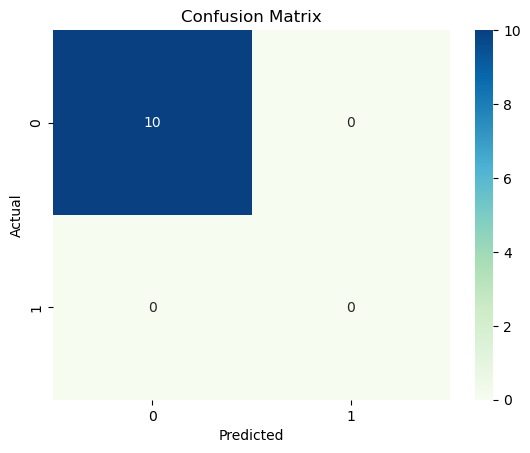

no. of iteration 20 Duration: 0:00:19.766983
20 (10, 432) (10,) (170, 432) (170,)
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


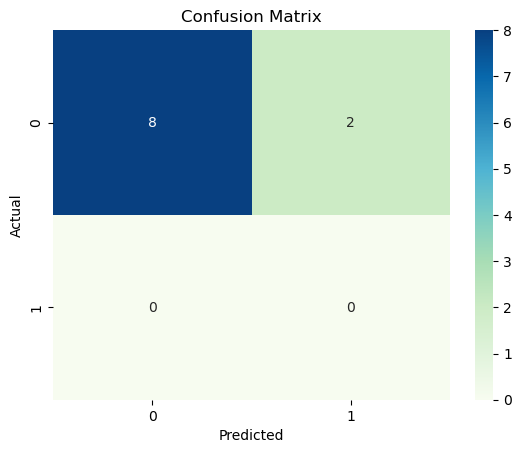

no. of iteration 30 Duration: 0:00:30.668847
30 (10, 432) (10,) (170, 432) (170,)
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


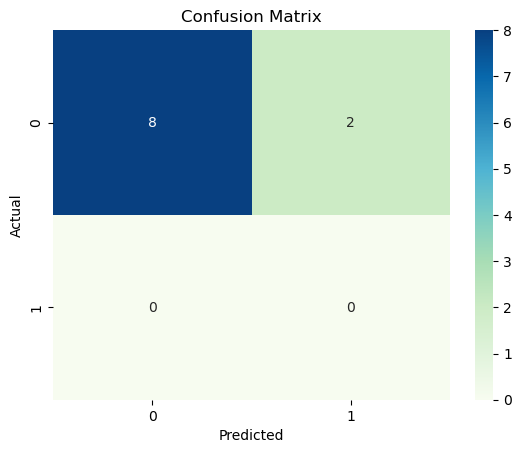

no. of iteration 40 Duration: 0:00:39.803046
40 (10, 432) (10,) (170, 432) (170,)
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


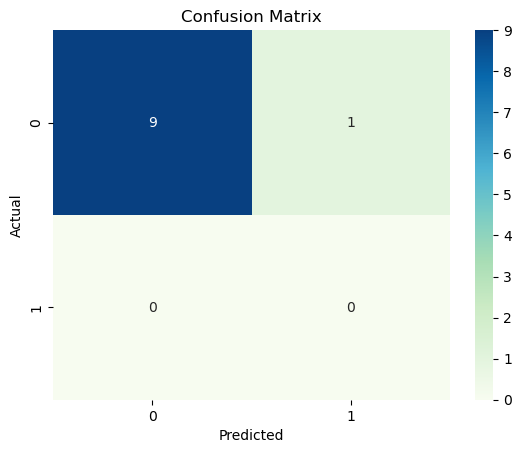

no. of iteration 50 Duration: 0:00:49.759266
50 (10, 432) (10,) (170, 432) (170,)
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


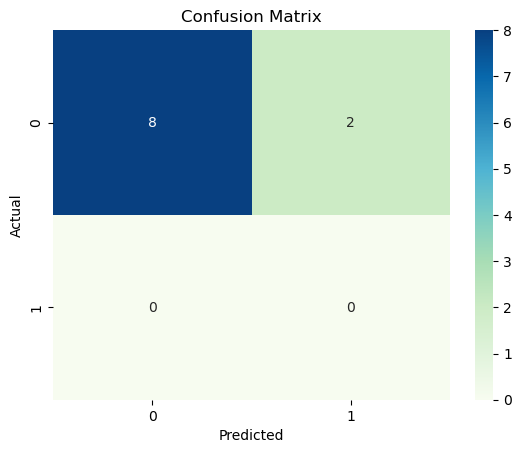

no. of iteration 60 Duration: 0:01:00.696114
60 (10, 432) (10,) (170, 432) (170,)
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


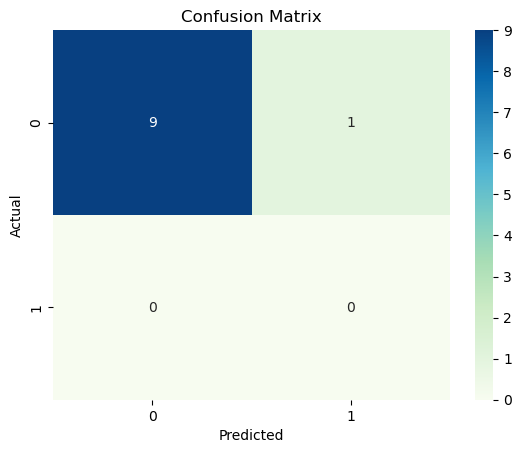

no. of iteration 70 Duration: 0:01:10.878995
70 (10, 432) (10,) (170, 432) (170,)
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


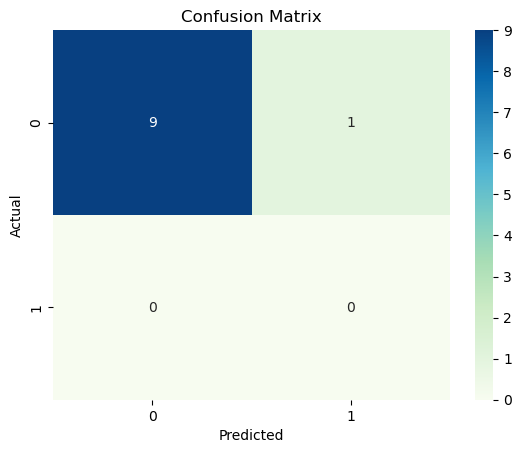

no. of iteration 80 Duration: 0:01:21.335039
80 (10, 432) (10,) (170, 432) (170,)
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


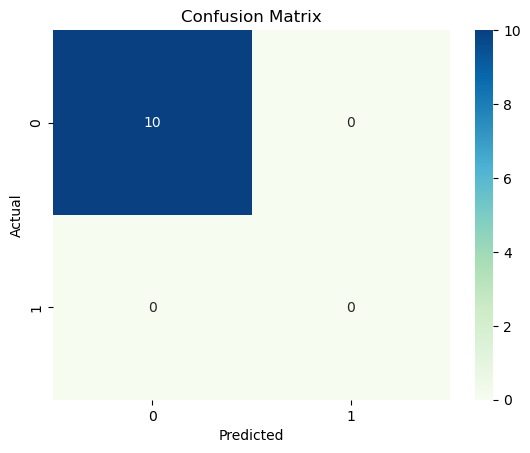

no. of iteration 90 Duration: 0:01:31.178105
90 (10, 432) (10,) (170, 432) (170,)
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


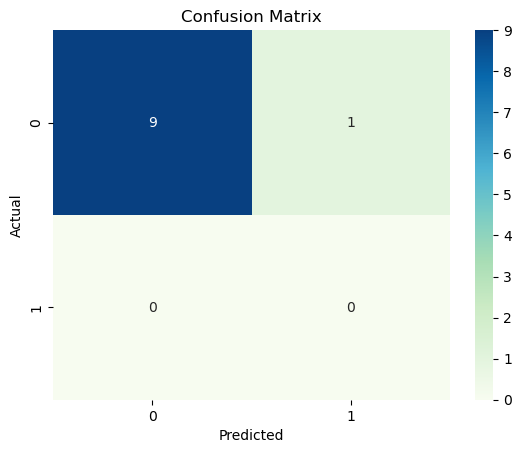

no. of iteration 100 Duration: 0:01:40.812292
100 (10, 432) (10,) (170, 432) (170,)
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[ 0  0]
 [ 0 10]]
sensitivity: 1.0
Specificity: nan


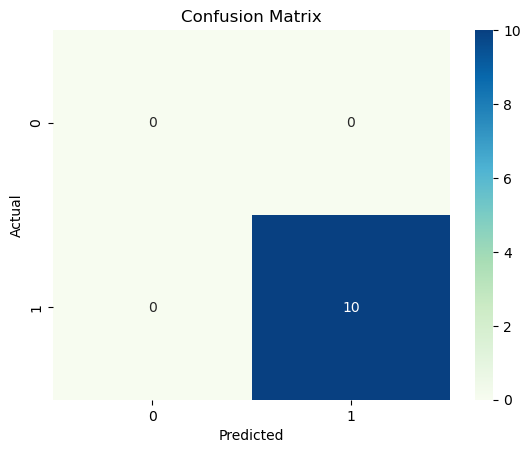

no. of iteration 110 Duration: 0:01:51.975766
110 (10, 432) (10,) (170, 432) (170,)
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


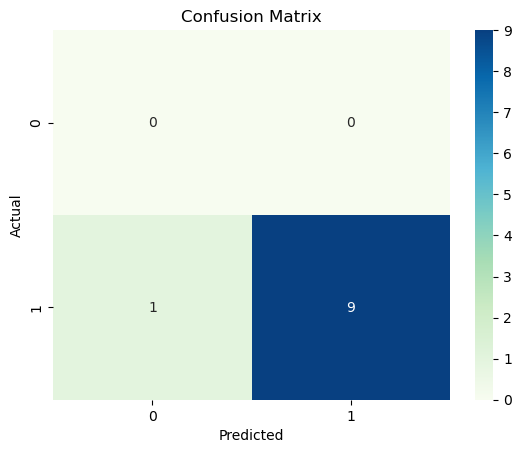

no. of iteration 120 Duration: 0:02:02.071073
120 (10, 432) (10,) (170, 432) (170,)
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[ 0  0]
 [ 0 10]]
sensitivity: 1.0
Specificity: nan


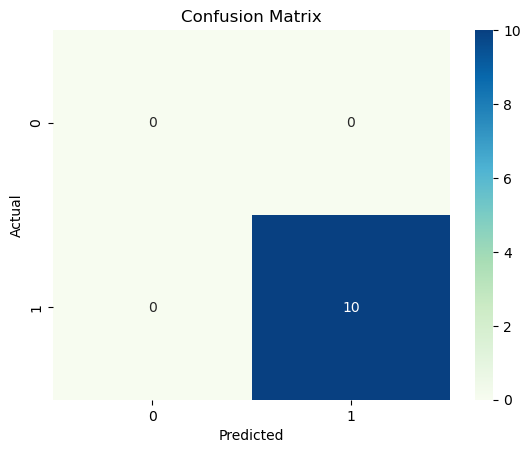

no. of iteration 130 Duration: 0:02:12.534997
130 (10, 432) (10,) (170, 432) (170,)
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[ 0  0]
 [ 0 10]]
sensitivity: 1.0
Specificity: nan


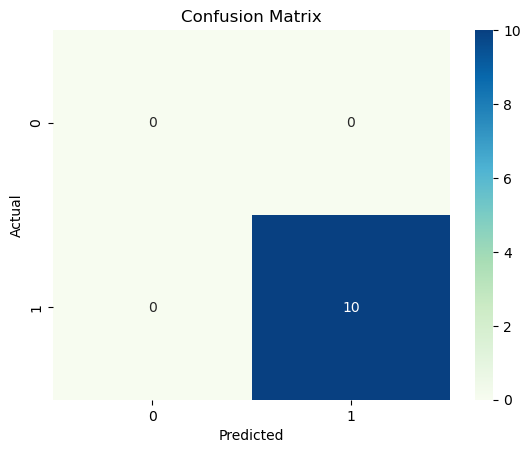

no. of iteration 140 Duration: 0:02:22.028920
140 (10, 432) (10,) (170, 432) (170,)
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [3 7]]
sensitivity: 0.7
Specificity: nan


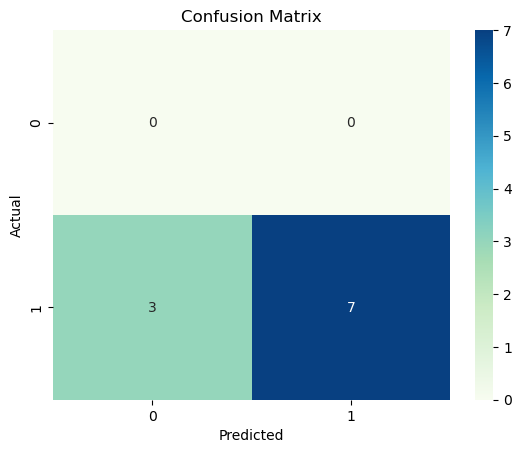

no. of iteration 150 Duration: 0:02:33.244178
150 (10, 432) (10,) (170, 432) (170,)
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [4 6]]
sensitivity: 0.6
Specificity: nan


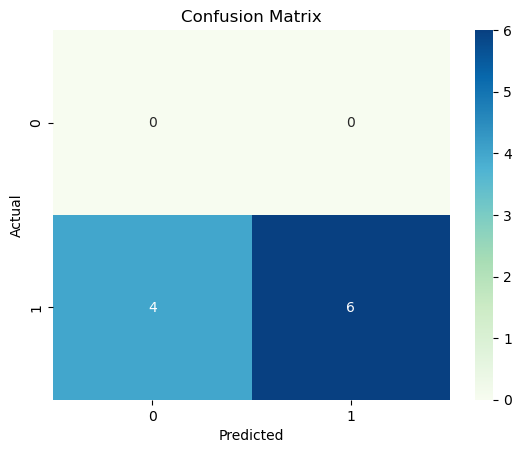

no. of iteration 160 Duration: 0:02:43.779002
160 (10, 432) (10,) (170, 432) (170,)
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


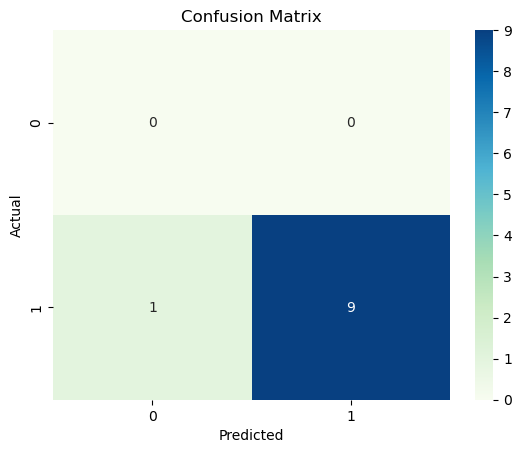

no. of iteration 170 Duration: 0:02:54.190463
170 (10, 432) (10,) (170, 432) (170,)
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


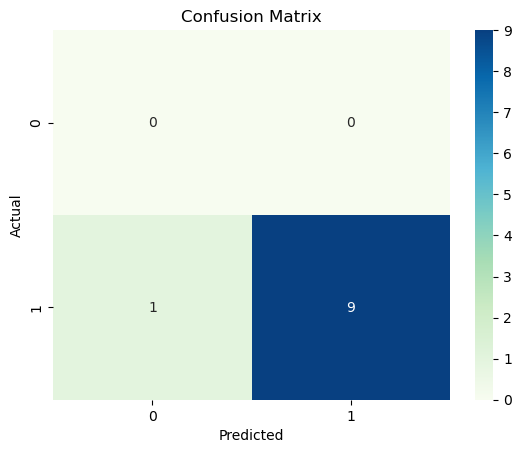

no. of iteration 180 Duration: 0:03:03.453392
Average svm score for the model of best feature sets: 0.8722222222222222


<AxesSubplot:>

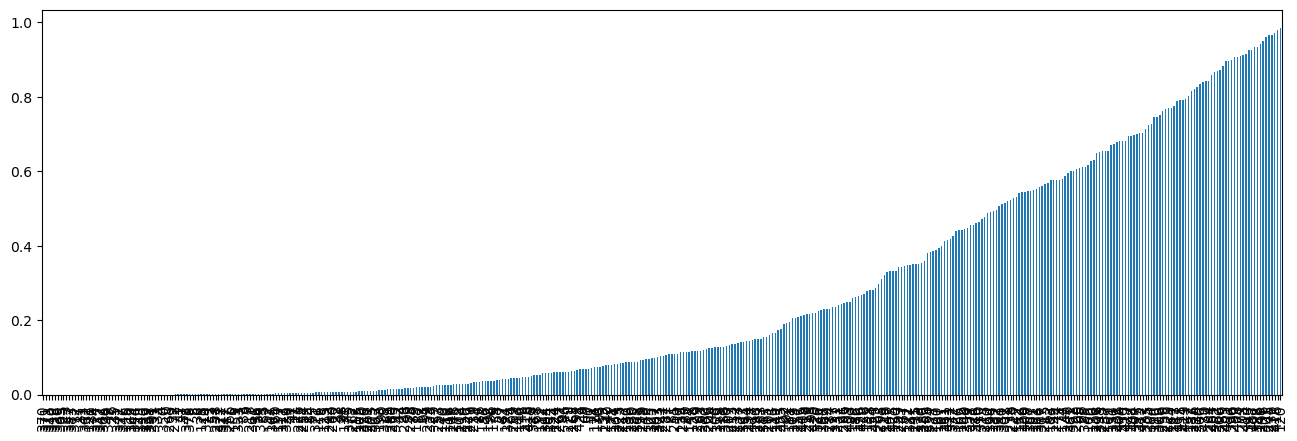

In [35]:
#LOGISTIC Regression - change model name and variables
average_accuracy_score = 0
accuracy_scores = 0
LR_accuracy_score = []
LR_specificity = []
LR_sensitivity = []
def run_lr(X_tr,X_te,y_tr,y_te):
        #global variables to be used in main function
        global average_accuracy_score, LR_accuracy_score, LR_specificity, LR_sensitivity 
        global accuracy_scores
        param_grid_lr = [{'penalty' : ['l2'],#, 'elasticnet', 'none','l1',]
               'C' : np.logspace(-4, 4, 20),
               'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
                'max_iter' : [100, 1000]#,2500, 5000]
               }]        
        #logistic regression
        #grid search cv performed to tune/select best hyper parameters for logistic regression model
        grid = GridSearchCV(LogisticRegression(),
                              param_grid_lr,verbose=True,n_jobs=-1)
        grid.fit(X_tr,y_tr.values.ravel())
        # predicted labels 
        y_pred = grid.predict(X_te)
        accuracy_scores = accuracy_score(y_te,y_pred)
        average_accuracy_score = average_accuracy_score + (accuracy_score(y_te,y_pred))
        
        #Save accuracy score in array
        LR_accuracy_score.append(accuracy_score(y_te,y_pred))
        # confusion matrix used as a reference to calculate recall, precision, sensitivity, specificity
        conf_matrix=confusion_matrix(y_te,y_pred,labels=[0,1])
        sensitivity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
        specificity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
        #Save values as an array
        LR_sensitivity.append(sensitivity)
        LR_specificity.append(specificity)
        print("Confusion Matrix:")
        print(conf_matrix)
        print("sensitivity:", sensitivity)
        print("Specificity:", specificity)
        #heat map for confusion matrices
        sns.heatmap(conf_matrix,cmap="GnBu",annot=True,
        #cbar_kws={"orientation":"vertical","label":"color bar"},
        xticklabels=[0,1],yticklabels=[0,1])
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
                                        
accuracy_score_list = []   
#to mark the start time of the compilation
start_time = datetime.now() 
# loocv is performed keeping all record from single patient together in testing set and the rest in training set
for i in range(0,X.shape[0],10): 
        # testing data
        x_test_forcv = X[i:i+10]
        y_test_forcv = y[i:i+10]
        # training data
        x_train_forcv = np.concatenate((X[:i],X[i+10:]),axis=0)
        y_train_forcv = np.concatenate((y[:i],y[i+10:]),axis=0)
        print(i,x_test_forcv.shape,y_test_forcv.shape,x_train_forcv.shape,y_train_forcv.shape)
        # converting to pandas dataframes from numpy
        X_train = pd.DataFrame(x_train_forcv)
        X_test = pd.DataFrame(x_test_forcv)
        y_test = pd.DataFrame(y_test_forcv)
        y_train = pd.DataFrame(y_train_forcv)
        # fischer selection for logistic regression starts from here
        sel=f_classif(x_train_forcv,y_train_forcv)
        # 2nd index of this array contains all the p values that are useful to filter features
        p_values = pd.Series(sel[1])
        p_values.sort_values(ascending=True,inplace=True)
        p_values_reduced = p_values[p_values<0.05]
        #p_values_reduced.index
        # reduced training and testing features using p values
        X_train_p  = X_train[p_values_reduced.index]
        X_test_p = X_test[p_values_reduced.index]
        # logistic regression model implemented on reduced feature variables by calling the pre defined function
        run_lr(X_train_p,X_test_p,y_train,y_test) 
        #measuring the end time after loocv iteration
        end_time = datetime.now()
        print('no. of iteration',i+10,'Duration: {}'.format(end_time - start_time))
        # accuracy score stored in an array to calculate average later
        accuracy_score_list.append(accuracy_scores)
#average_accuracy_score = 0
#plot for last case only
print('Average svm score for the model of best feature sets:',average_accuracy_score/18)

# for last one iteration p_value plot for all feature sets 
p_values.plot.bar(figsize = (16,5))

In [37]:
print("Accuracy score Mean:")
print(np.mean(LR_accuracy_score))
print("\n Accuracy score Sd:")
print(np.std(LR_accuracy_score))
print("\n Sensivitity score mean:")
print(np.nanmean(LR_sensitivity))
print("\n Specificity score mean:")
print(np.nanmean(LR_specificity))

Accuracy score Mean:
0.8722222222222222

 Accuracy score Sd:
0.1145307118227128

 Sensivitity score mean:
0.875

 Specificity score mean:
0.8699999999999999
